In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.
C:\Users\trytr\PycharmProjects\DL\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\trytr\PycharmProjects\DL\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\trytr\PycharmProjects\DL\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\trytr\PycharmProjects\DL\venv

In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
trans = ["飛機", "汽車", "鳥", "貓", "鹿",
         "狗", "青蛙", "馬", "船", "卡車"]

青蛙


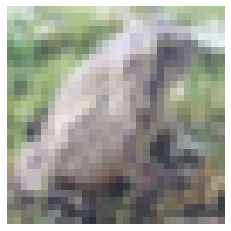

In [12]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
plt.axis("off")
# trans[0] -> 飛機
# XX -> trans[ [0] ], 錯誤的取出方法
# category = y_train[c][0] -> 取出串列List第一個值
category = y_train[c][0]
print(trans[category])
plt.imshow(x_train[c])

In [14]:
# 資料預處理
# 1. 題目預處理(Normalize)
# 做卷積不需要攤開成1D, 直接進去
x_train_shape = x_train / 255
x_test_shape = x_test / 255
# DEMO
x_train_shape[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [15]:
# 2. 答案預處理(One-hot encoding)
# 跟上次一模一樣
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# Demo
print("原來:", y_train[1])
print("後來:", y_train_cat[1])

原來: [9]
後來: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [16]:
from keras.models import Sequential
# 在MLP時, 需要Dense與Flatten
# Flatten層, 做reshape, 平坦化成一維後, 進入MLP
from keras.layers import Dense, Flatten
# 選Conv2D, 有寬與高
from keras.layers import Conv2D, MaxPooling2D
# -----------CNN區段, 使用簡化的VGG16, 完整的可以參考講義-----------
cnn = Sequential()
#  Conv2D(filters, 
#  kernel sizes(過濾器大小), 
#  input_shape=(x,x,x), 
#  padding="same"("same"有加外圍一圈, 經filter後不會減少資訊; "valid"則沒加外圍一圈, 經filter後, 會減少資訊)),
#  activation = "relu"(中間選relu)
# (一個過濾器) 3 * 3 (filter中參數數目)* 3 (彩色) * 32 (filter數目)+ 32 (bias)= 896
cnn.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding="same", activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# (一個過濾) 3 * 3 (filter中參數數目) * 32 (前面取32個特徵) * 64 (filter數目) + 64 (bias) = 18496
cnn.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
# -------------------------------MLP區段-----------------------------
cnn.add(Dense(256, activation="relu"))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
__________

In [17]:
# 確定模型訓練方式....等
# 隨機(隨便選一組weights)梯度(正確方向)下降
# loss: 最後輸出一個: binary_crossentropy, 最後輸出多個: categorical_crossentropy
# optimizer: 下降的時候優化 -> 基於動量(我在走的時候不是等速度, 而有速度的累積)
cnn.compile(loss="categorical_crossentropy", 
            metrics=["accuracy"], 
            optimizer="adam")

In [18]:
# batch: 看幾筆(200)做一次梯度下降(修正)
# epochs: 整份考古題看幾次(10)
# 10個epoch, 200batch: 60000 * 10 / 200 -> 3000(次)
cnn.fit(x_train_shape, 
        y_train_cat, 
        batch_size=200, 
        epochs=10, 
        validation_split=0.1,
        verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 45s - loss: 1.5745 - acc: 0.4263 - val_loss: 1.3017 - val_acc: 0.5336
Epoch 2/10
 - 43s - loss: 1.1706 - acc: 0.5850 - val_loss: 1.0399 - val_acc: 0.6382
Epoch 3/10
 - 42s - loss: 0.9884 - acc: 0.6542 - val_loss: 0.9774 - val_acc: 0.6640
Epoch 4/10
 - 42s - loss: 0.8824 - acc: 0.6920 - val_loss: 0.9158 - val_acc: 0.6800
Epoch 5/10
 - 44s - loss: 0.7964 - acc: 0.7201 - val_loss: 0.8506 - val_acc: 0.7134
Epoch 6/10
 - 42s - loss: 0.7171 - acc: 0.7482 - val_loss: 0.7943 - val_acc: 0.7242
Epoch 7/10
 - 42s - loss: 0.6576 - acc: 0.7711 - val_loss: 0.7623 - val_acc: 0.7366
Epoch 8/10
 - 44s - loss: 0.5957 - acc: 0.7929 - val_loss: 0.7731 - val_acc: 0.7410
Epoch 9/10
 - 43s - loss: 0.5486 - acc: 0.8102 - val_loss: 0.7631 - val_acc: 0.7442
Epoch 10/10
 - 43s - loss: 0.4843 - acc: 0.8317 - val_loss: 0.7984 - val_acc: 0.7414


In [25]:
cnn.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 3s 338us/step


[0.8230321268081665, 0.7357]

In [12]:
import pandas as pd
# predict: 機率 predict_classes: 分類
# trans = ["飛機", "汽車", "鳥", "貓", "鹿",
#            "狗", "青蛙", "馬", "船", "卡車"]
pre = cnn.predict_classes(x_test_shape)
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,741,21,39,12,47,13,16,9,63,39
1,17,821,6,5,6,3,14,4,19,105
2,67,6,511,34,139,101,76,41,12,13
3,19,16,56,376,134,220,101,37,16,25
4,15,3,45,27,725,48,63,58,12,4
5,10,4,33,86,76,690,43,41,8,9
6,5,5,31,29,51,31,830,3,4,11
7,13,4,19,25,89,82,13,741,1,13
8,55,38,11,5,20,12,8,3,815,33
9,34,78,6,12,8,13,14,7,21,807


In [13]:
# 一個 List 到底, 一維
pre.shape

(10000,)

In [14]:
# 保持隨時可以擴充性, 二維
y_test.shape

(10000, 1)

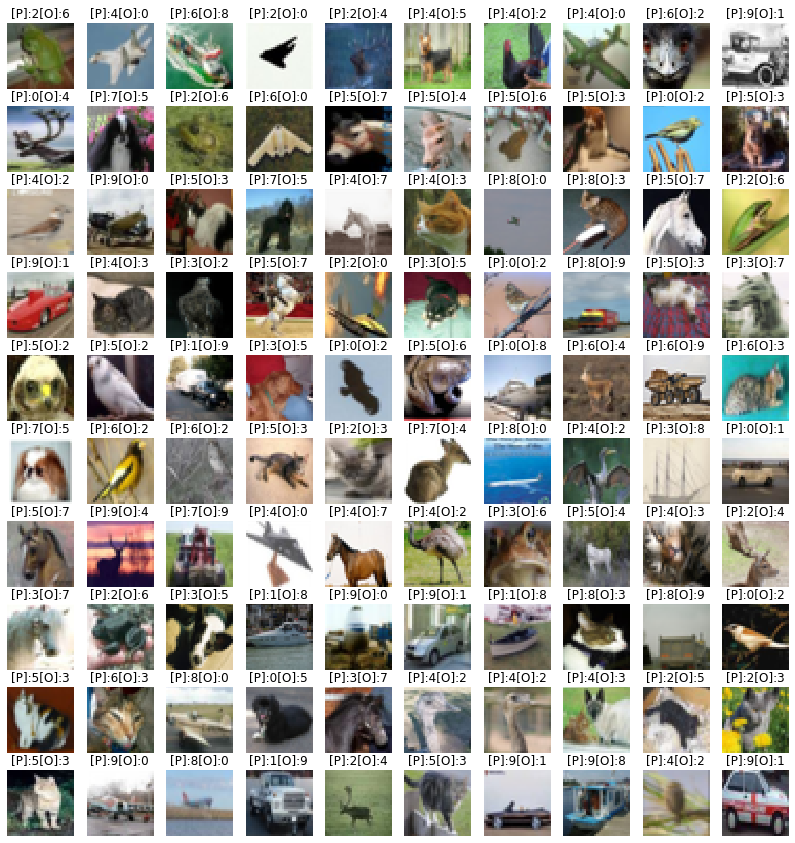

In [15]:
# numpy才能這樣直接每個數字比較
import numpy as np
# list: list[一個數字]
# numpy array: nparray[ [多個數字] ]
# pre 與 y_test維度需要一樣, 轉成1D做比較
y_dim = y_test.reshape(10000)
diff = np.nonzero(pre != y_dim)[0]
# 預測錯誤的圖的原本標籤
orifalse = y_dim[diff]
# 預測錯誤的圖的預測標籤
prefalse = pre[diff]
# 把圖拿出來
imgfalse = x_test[diff]
# 整張圖的寬高
plt.figure(figsize=(14, 450))
# 我們每一個列就是10個
width = 10
height = int(len(imgfalse) / 10) + 1
# 下面 imgfalse[0:100] -> 取100張
for (i, img) in enumerate(imgfalse[0:100]):
    # (列數, 行數, 第幾張圖(i開始))
    plt.subplot(height, width, i + 1)
    plt.axis("off")
    t = "[P]:" + str(prefalse[i]) + "[O]:" + str(orifalse[i])
    plt.title(t)
    plt.imshow(img)
# trans = ["飛機", "汽車", "鳥", "貓", "鹿",
#            "狗", "青蛙", "馬", "船", "卡車"]